# Answer to Question 1 :
Reading the csv file using pandas and storing it in a dataframe

In [1]:
## Classification Algorithms

from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC


from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder

import pandas as pd
import numpy as np

# importing ploting libraries
import matplotlib.pyplot as plt   
# To enable plotting graphs in Jupyter notebook
%matplotlib inline
#importing seaborn for statistical plots
import seaborn as sns


# Libraries for constructing Pipelines
from sklearn.pipeline import Pipeline, make_pipeline

from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score

# Library for Normalization of Numerical Data
from scipy.stats import zscore

# calculate accuracy measures and confusion matrix
from sklearn import metrics
from sklearn.metrics import confusion_matrix

# Suppress warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
data = pd.read_csv("C:\\Users\\VISHAL\\Documents\\Case Studies_10K\\6-12\\german.csv", header=0, infer_datetime_format=True, parse_dates=[0], index_col=[0])

In [3]:
# Checking the shape of the data (dimensions)
data.shape

# 1000 rows and 21 columns

(1000, 21)

In [4]:
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21
1,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,good,A192,A201,1
2,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,good,A191,A201,2
3,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,bad,A191,A201,1
4,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,bad,A191,A201,1
5,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,bad,A191,A201,2


# Answer to Question 2:

In [5]:
data.columns = ['chk_acct','duration','credit_his','purpose','amount','saving_acct',
               'present_emp','installment_rate','sex','other_debtor','present_resid','property',
               'age','other_install','housing','n_credits','job','n_people','telephone','foreign','response']
data

,chk_acct,duration,credit_his,purpose,amount,saving_acct,present_emp,installment_rate,sex,other_debtor,...,property,age,other_install,housing,n_credits,job,n_people,telephone,foreign,response
1,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,good,A192,A201,1
2,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,good,A191,A201,2
3,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,bad,A191,A201,1
4,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,bad,A191,A201,1
5,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,bad,A191,A201,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,A14,12,A32,A42,1736,A61,A74,3,A92,A101,...,A121,31,A143,A152,1,A172,good,A191,A201,1
997,A11,30,A32,A41,3857,A61,A73,4,A91,A101,...,A122,40,A143,A152,1,A174,good,A192,A201,1
998,A14,12,A32,A43,804,A61,A75,4,A93,A101,...,A123,38,A143,A152,1,A173,good,A191,A201,1
999,A11,45,A32,A43,1845,A61,A73,4,A93,A101,...,A124,23,A143,A153,1,A173,good,A192,A201,2


# Answer to Question 3 :

In [6]:
#orginal response coding 1= good, 2 = bad
#we need 0 = good, 1 = bad

data['response'] = data['response'].apply(lambda x: x - 1)
data

,chk_acct,duration,credit_his,purpose,amount,saving_acct,present_emp,installment_rate,sex,other_debtor,...,property,age,other_install,housing,n_credits,job,n_people,telephone,foreign,response
1,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,good,A192,A201,0
2,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,good,A191,A201,1
3,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,bad,A191,A201,0
4,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,bad,A191,A201,0
5,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,bad,A191,A201,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,A14,12,A32,A42,1736,A61,A74,3,A92,A101,...,A121,31,A143,A152,1,A172,good,A191,A201,0
997,A11,30,A32,A41,3857,A61,A73,4,A91,A101,...,A122,40,A143,A152,1,A174,good,A192,A201,0
998,A14,12,A32,A43,804,A61,A75,4,A93,A101,...,A123,38,A143,A152,1,A173,good,A191,A201,0
999,A11,45,A32,A43,1845,A61,A73,4,A93,A101,...,A124,23,A143,A153,1,A173,good,A192,A201,1


# Answer to Question 4 :

In [7]:
# Levels : 0 and 1 ( 0 = good, 1 = bad)

data['response'] = data['response'].apply(str)

In [8]:
data.dtypes

chk_acct            object
duration             int64
credit_his          object
purpose             object
amount               int64
saving_acct         object
present_emp         object
installment_rate     int64
sex                 object
other_debtor        object
present_resid        int64
property            object
age                  int64
other_install       object
housing             object
n_credits            int64
job                 object
n_people            object
telephone           object
foreign             object
response            object
dtype: object

In [9]:
data['response']

1       0
2       1
3       0
4       0
5       1
       ..
996     0
997     0
998     0
999     1
1000    0
Name: response, Length: 1000, dtype: object

# Answer to Question 5:

In [10]:
data.describe()

,duration,amount,installment_rate,present_resid,age,n_credits
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000


In [11]:
data.dtypes
# Here : all the variables are either integer or object

chk_acct            object
duration             int64
credit_his          object
purpose             object
amount               int64
saving_acct         object
present_emp         object
installment_rate     int64
sex                 object
other_debtor        object
present_resid        int64
property            object
age                  int64
other_install       object
housing             object
n_credits            int64
job                 object
n_people            object
telephone           object
foreign             object
response            object
dtype: object

# Answer to Question 6:

In [12]:
corrMatrix = data.corr()
print (corrMatrix)

                  duration    amount  installment_rate  present_resid  \
duration          1.000000  0.624984          0.074749       0.034067   
amount            0.624984  1.000000         -0.271316       0.028926   
installment_rate  0.074749 -0.271316          1.000000       0.049302   
present_resid     0.034067  0.028926          0.049302       1.000000   
age              -0.036136  0.032716          0.058266       0.266419   
n_credits        -0.011284  0.020795          0.021669       0.089625   

                       age  n_credits  
duration         -0.036136  -0.011284  
amount            0.032716   0.020795  
installment_rate  0.058266   0.021669  
present_resid     0.266419   0.089625  
age               1.000000   0.149254  
n_credits         0.149254   1.000000  


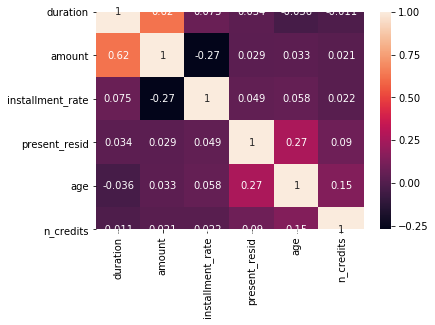

In [13]:
import seaborn as sn
import matplotlib.pyplot as plt
sn.heatmap(corrMatrix, annot=True)
plt.show()

# Answer to Question 7: 

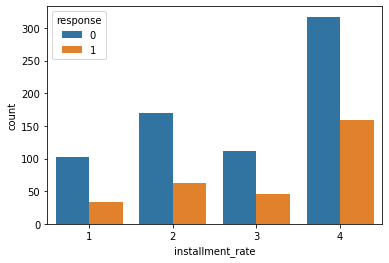

In [14]:
sns.countplot(x= 'installment_rate', data = data, hue= 'response')

# Answer to Question 8 : 

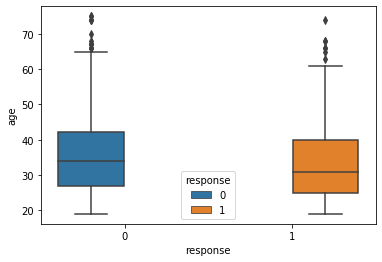

In [15]:
sns.boxplot(x='response', y='age',
                 data=data, 
                 hue='response')

# Answer to Question 9:

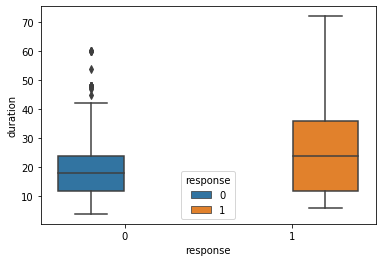

In [16]:
sns.boxplot(x='response', y='duration',
                 data=data, 
                 hue='response')

# Answer to Question 10:

Observation for 7th graph:
The installment_rate variable has a great deal of difference between the good and bad records, we see that bad records have almost the double median value than good ones.

Observation for 8th graph :
From the age variable, we see that the median value for bad records is lesser than that of good records, it might be premature to say young people tend to have bad credit records, but we can safely assume it tends to be riskier.

Observation for 9th graph:
The median value and the range of the duration variables appears to be on the higher side of bad records as compared to good records

# Answer to Question 11:

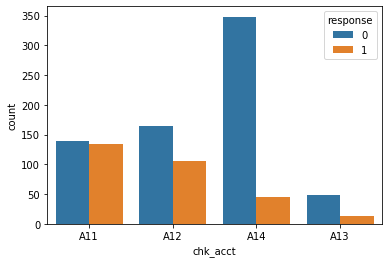

In [17]:
sns.countplot(x= 'chk_acct', data = data, hue= 'response')

# Answer to Question 12:

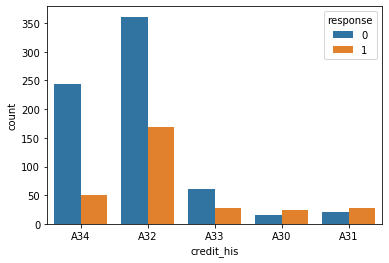

In [18]:
sns.countplot(x= 'credit_his', data = data, hue= 'response')

# Answer to Question : 13

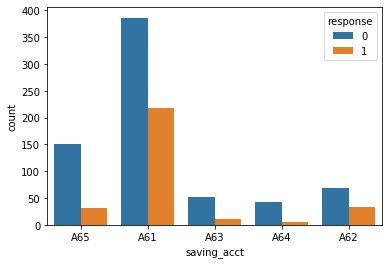

In [19]:
sns.countplot(x= 'saving_acct', data = data, hue= 'response')

# Answer to Question: 14

Observation for 11th graph:
For chk_acct we see that, the current status of the checking account matters as the frequency of the response variables is seen to differ from one sub category to another, overall A11 houses more number of bad credit records and A14 the least

Observation for 12th graph:
For credit_his, we observe that proportion of the response variable varies significantly, for categories A30, A31 we see the number of bad credit records are greater.

Observations for 13th graph:
With respect to 'Savings Account' we can visually observe that people with 'little' (A61) or 'moderate' (A62) income are likely to default more.

# Answer to Question : 15

In [32]:
x= data[['age', 'sex', 'housing', 'saving_acct',
       'chk_acct', 'duration','amount']]
y = data['response']

In [21]:
data['age'] = data['age'].apply(str)
data['sex'] = data['sex'].apply(str)
data['housing'] = data['housing'].apply(str)
data['saving_acct'] = data['saving_acct'].apply(str)
data['chk_acct'] = data['chk_acct'].apply(str)

In [30]:
data['age'] = data['age'].astype(int)
data['duration'] = data['duration'].astype(int)
data['amount'] = data['amount'].astype(int)

In [31]:
data.dtypes

chk_acct            object
duration             int32
credit_his          object
purpose             object
amount               int32
saving_acct         object
present_emp         object
installment_rate     int64
sex                 object
other_debtor        object
present_resid        int64
property            object
age                  int32
other_install       object
housing             object
n_credits            int64
job                 object
n_people            object
telephone           object
foreign             object
response            object
dtype: object

# Answer to Question : 16

In [23]:
# List to store Categorical Columns
cat_cols = list(x.columns[x.dtypes == 'object'])
print("Categorical Columns: ",cat_cols)

# List to store Numerical Columns
num_cols = list(x.columns[x.dtypes != 'object'])
print("\nNumerical Columns:" ,num_cols)

## One-Hot Encoding Categorical Columns
x_dummy =  pd.get_dummies(x[cat_cols], drop_first=True)

## Joining New dummified and Numerical columns
x_new = pd.concat([x_dummy, x[num_cols]], axis=1, join='inner')

#### Normalizing the Dataset
ss = StandardScaler()

x_normal = ss.fit_transform(x_new)

Categorical Columns:  ['sex', 'housing', 'saving_acct', 'chk_acct']

Numerical Columns: ['age', 'duration']


# Answer to Question : 17

In [33]:
x_int, x_test, y_int, y_test = train_test_split(x_normal, y, test_size=100, stratify=y, random_state = 666)
x_train,x_val,y_train,y_val = train_test_split(x_int, y_int, test_size=100, stratify = y_int, random_state = 666)
print('train: {}% | Validation: {}% | Test: {}%'.format( round(len(y_train)/len(y),2), 
                                                        round(len(y_val)/len(y) ,2), 
                                                        round(len(y_test)/len(y),2) ) )

train: 0.8% | Validation: 0.1% | Test: 0.1%


# Answer to Question : 18

In [25]:
lr = LogisticRegression()

model = lr.fit(x_train, y_train)

model.score(x_val, y_val)

0.71

# Answer to Question : 19

In [26]:
# Predcited probability of each class.
y_pred_prob = model.predict_proba(x_test)

# Predicted value of each class
y_pred = model.predict(x_test)

cMatrix = confusion_matrix(y_test, y_pred)
print(cMatrix)

[[65  5]
 [23  7]]


# Answer to Question : 20

In [27]:
print("Transactions which were falsely classified as FRAUD =  %.1f Percent" %(cMatrix[0][1]/ sum(sum(cMatrix))*100 ) )
print("Transactions which were falsely classified as NOT-FRAUD = %.1f Percent"%(cMatrix[1][0]/ sum(sum(cMatrix))*100 ) )
print("Transactions which were truly classified as FRAUD = %.1f Percent"% (cMatrix[1][1]/ sum(sum(cMatrix))*100 ) )
print("Transactions which were truly classified as NOT-FRAUD = %.1f Percent"% (cMatrix[0][0]/ sum(sum(cMatrix))*100 ))

Transactions which were falsely classified as FRAUD =  5.0 Percent
Transactions which were falsely classified as NOT-FRAUD = 23.0 Percent
Transactions which were truly classified as FRAUD = 7.0 Percent
Transactions which were truly classified as NOT-FRAUD = 65.0 Percent


# Answer to Questions 21 and 22:

In [36]:
# precision, recall and F1
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
y_train = np.array([number[0] for number in lb.fit_transform(y_train)])

models = []

models.append(('LR', LogisticRegression()))
models.append(('SVC', SVC()))
models.append(('RF', RandomForestClassifier()))

# Model Evaluation

result = []
model_names = []
scoring = ['accuracy', 'recall', 'precision', 'roc_auc']

for model_name, model in models:
    kfold = KFold(n_splits=10, random_state=666)
    cv_results1 = cross_val_score(model, x_train, y_train, cv = kfold, scoring=scoring[0])
    cv_results2 = cross_val_score(model, x_train, y_train, cv = kfold, scoring=scoring[1])
    cv_results3 = cross_val_score(model, x_train, y_train, cv = kfold, scoring=scoring[2])
    cv_results4 = cross_val_score(model, x_train, y_train, cv = kfold, scoring=scoring[3])
    model_names.append(model_name)
    msg = "%s:\n ACCURACY = %f, RECALL=(%f), PRECISION=(%f), ROC-AUC=(%f)" % (model_name, cv_results1.mean(),cv_results2.mean(), cv_results3.mean(), cv_results4.mean())
    print(msg)

LR:
 ACCURACY = 0.743750, RECALL=(0.410541), PRECISION=(0.625998), ROC-AUC=(0.753581)
SVC:
 ACCURACY = 0.726250, RECALL=(0.322159), PRECISION=(0.581653), ROC-AUC=(0.726648)
RF:
 ACCURACY = 0.701250, RECALL=(0.364039), PRECISION=(0.488075), ROC-AUC=(0.697538)
